#   importing libray


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


#     Load dataset

In [2]:
df = pd.read_csv('/content/cybersecurity_intrusion_data.csv')
df.head()

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


#    Basic Data Overview

In [8]:
df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB


Index(['session_id', 'network_packet_size', 'protocol_type', 'login_attempts',
       'session_duration', 'encryption_used', 'ip_reputation_score',
       'failed_logins', 'browser_type', 'unusual_time_access',
       'attack_detected'],
      dtype='object')

# cheacking missing value

In [5]:
df.isnull().sum()

,0
session_id,0
network_packet_size,0
protocol_type,0
login_attempts,0
session_duration,0
encryption_used,1966
ip_reputation_score,0
failed_logins,0
browser_type,0
unusual_time_access,0


#   Class distribution

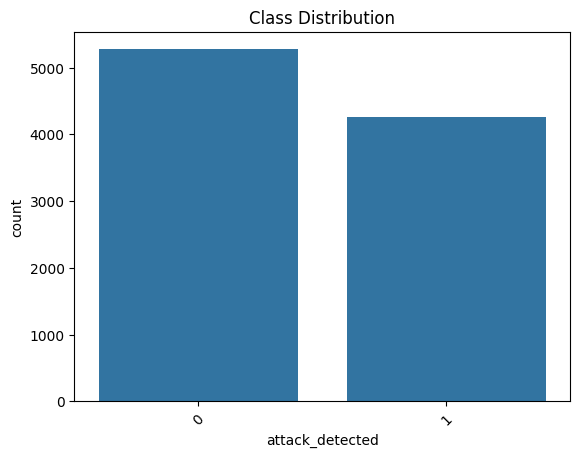

In [10]:
sns.countplot(data=df, x='attack_detected')

plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.show()

#    Feature Distributions

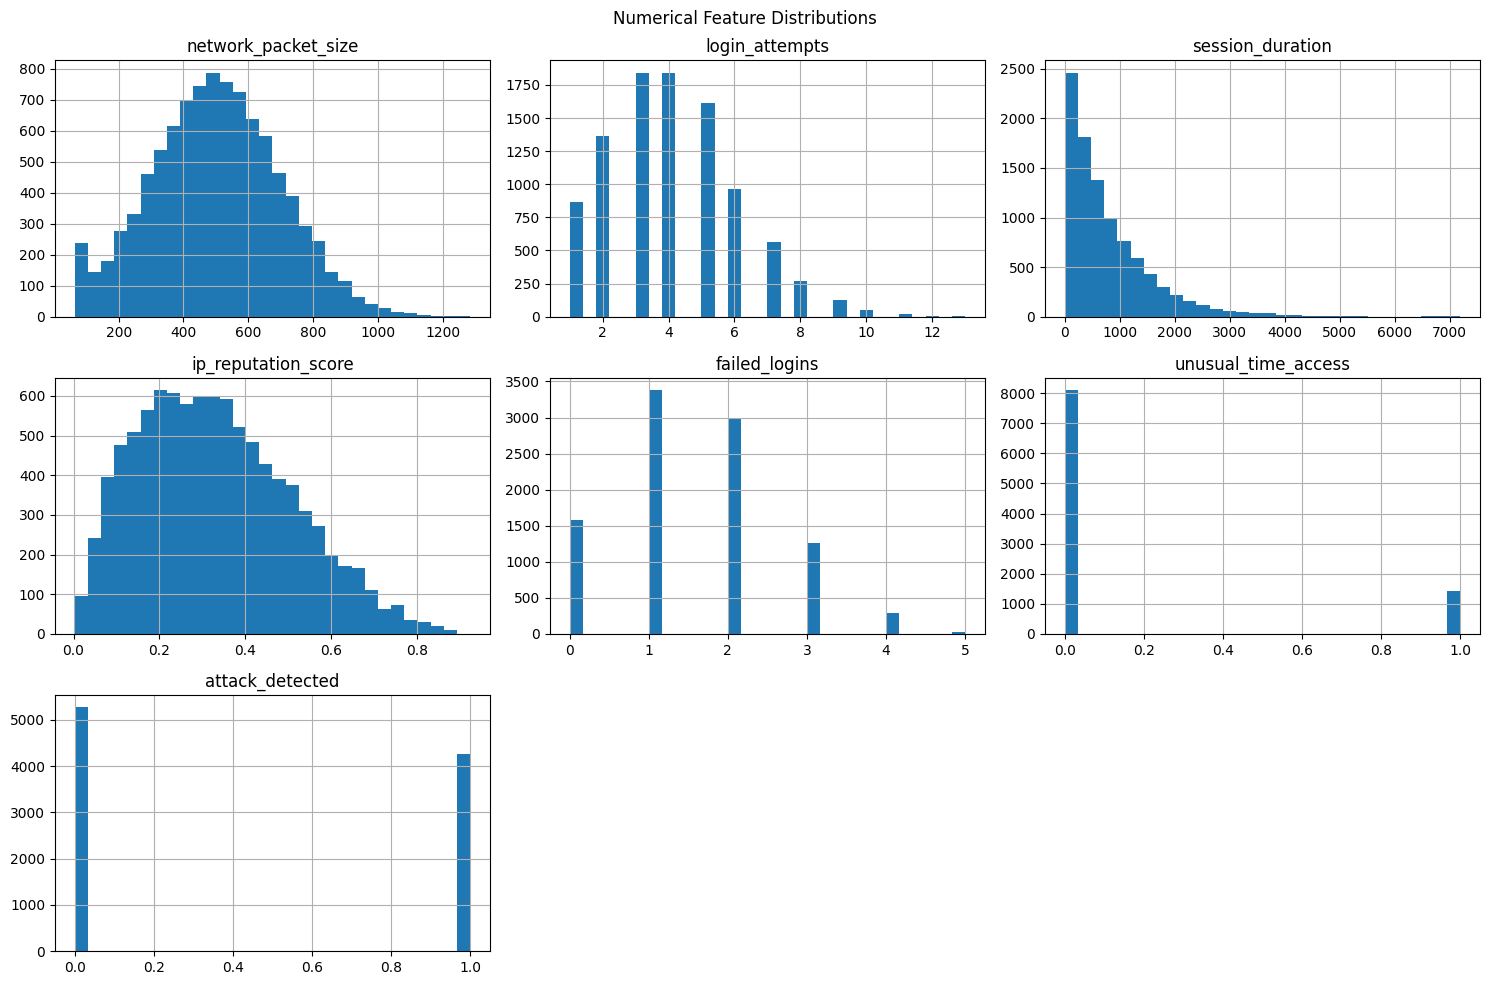

In [12]:
num_cols = df.select_dtypes(include=[np.number]).columns

df[num_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle("Numerical Feature Distributions")
plt.tight_layout()
plt.show()

#   Correlation Heatmap

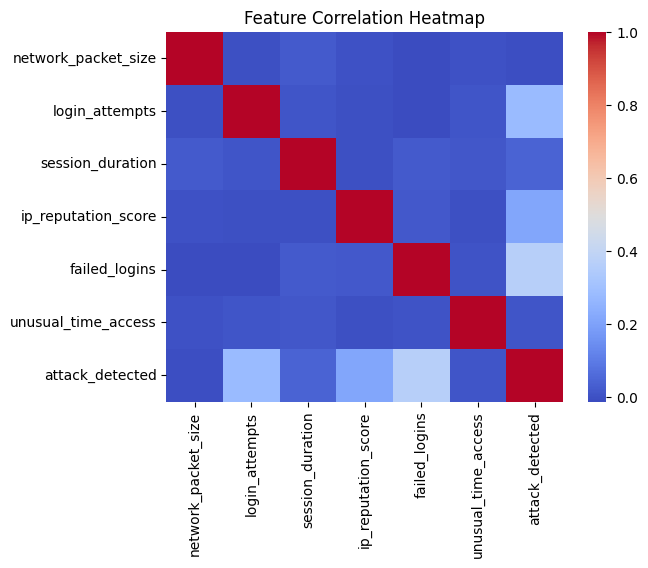

In [13]:
corr = df[num_cols].corr()
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


#   Class Imbalance Check

In [15]:
from collections import Counter
from sklearn.utils import resample

# Count per class
counter = Counter(df['attack_detected'])
print("📊 Class counts:", counter)

# Optional: Balance summary
df_majority = df[df['attack_detected'] == df['attack_detected'].value_counts().idxmax()]
df_minority = df[df['attack_detected'] != df['attack_detected'].value_counts().idxmax()]

print(f"🔎 Majority class: {len(df_majority)}")
print(f"🔎 Minority class: {len(df_minority)}")

📊 Class counts: Counter({0: 5273, 1: 4264})
🔎 Majority class: 5273
🔎 Minority class: 4264
